In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import sys
import torch.nn.functional as F

In [3]:
import torchxrayvision
import torchxrayvision as xrv

In [4]:
d_nih = xrv.datasets.NIH_Dataset(imgpath="/lustre04/scratch/cohenjos/NIH/images-224")
xrv.datasets.relabel_dataset(xrv.datasets.default_pathologies, d_nih)

Lung Lesion doesn't exist. Adding nans instead.
Fracture doesn't exist. Adding nans instead.
Lung Opacity doesn't exist. Adding nans instead.
Enlarged Cardiomediastinum doesn't exist. Adding nans instead.


{'Atelectasis': 0.0,
 'Consolidation': 1.0,
 'Infiltration': 1.0,
 'Pneumothorax': 0.0,
 'Edema': 0.0,
 'Emphysema': 0.0,
 'Fibrosis': 0.0,
 'Effusion': 0.0,
 'Pneumonia': 0.0,
 'Pleural_Thickening': 1.0,
 'Cardiomegaly': 0.0,
 'Nodule': 0.0,
 'Mass': 0.0,
 'Hernia': 0.0,
 'Lung Lesion': nan,
 'Fracture': nan,
 'Lung Opacity': nan,
 'Enlarged Cardiomediastinum': nan}

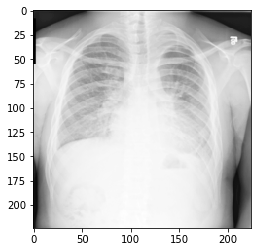

In [14]:
sample = d_nih[1000]
plt.imshow(sample["img"][0], cmap="Greys_r");
dict(zip(d_nih.pathologies,sample["lab"]))

In [16]:
model = xrv.models.DenseNet(weights="all")

In [30]:
out = model(torch.from_numpy(sample["img"]).unsqueeze(0))

In [31]:
torch.sigmoid(out)[0].detach().numpy()

array([0.05540602, 0.01189279, 0.06663614, 0.0029249 , 0.00209931,
       0.00161398, 0.00232134, 0.02118121, 0.02897279, 0.01077805,
       0.01774187, 0.01726562, 0.00524472, 0.0006357 , 0.00863012,
       0.0305516 , 0.10500807, 0.020898  ], dtype=float32)

In [32]:
dict(zip(d_nih.pathologies,torch.sigmoid(out)[0].detach().numpy()))

{'Atelectasis': 0.05540602,
 'Consolidation': 0.011892789,
 'Infiltration': 0.06663614,
 'Pneumothorax': 0.002924904,
 'Edema': 0.0020993054,
 'Emphysema': 0.0016139754,
 'Fibrosis': 0.002321342,
 'Effusion': 0.021181207,
 'Pneumonia': 0.02897279,
 'Pleural_Thickening': 0.010778053,
 'Cardiomegaly': 0.017741874,
 'Nodule': 0.01726562,
 'Mass': 0.005244722,
 'Hernia': 0.0006356969,
 'Lung Lesion': 0.00863012,
 'Fracture': 0.0305516,
 'Lung Opacity': 0.10500807,
 'Enlarged Cardiomediastinum': 0.020897998}